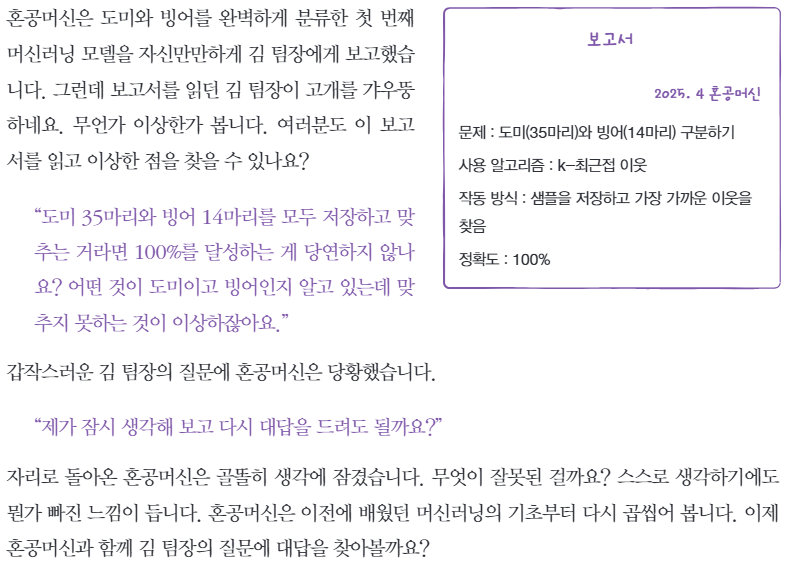

#머신러닝 알고리즘 종류
- 지도학습 (ex : k-최근접 이웃) : 입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는데 활용
- 비지도학습 : 타깃 데이터가 없음, 주로 어떤 패턴을 찾는 데 활용
- 강화학습

#지도학습
- 지도학습에서 데이터와 정답을 입력(input)과 타깃(target)이라고 하고 이 둘을 합쳐 훈련데이터(training data)라고 한다
- 입력으로 사용된 변수의 종류를 **특성**이라고 한다
###훈련 세트 (train set)
- 훈련에 사용되는 데이터
- 테스트 셋을 제외한 모든 데이터를 사용
###테스트 세트 (test set)
- 평가에 사용되는 데이터
- 전체 데이터에서 20~30%를 사용
- 전체 데이터가 아주 크다면 1%만 덜어내도 충분
###모델 평가시
- 훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않다

#실습 코드

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

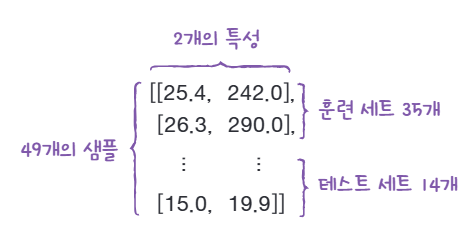

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# Train Set
train_input = fish_data[:35]
train_target = fish_target[:35]

# Test Set
test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

#샘플링 편향 (sampling bias)
- 위의 코드는 훈련세트와 테스트세트에 샘플이 골고루 섞여있지 않기 때문에 평가 점수가 위와 같다
- 골고루 샘플을 뽑아서 훈련세트와 테스트를 만들어야 한다

#Numpy
- 고차원의 배열을손쉽게 만들고 조작할 수 있는 라이브러리

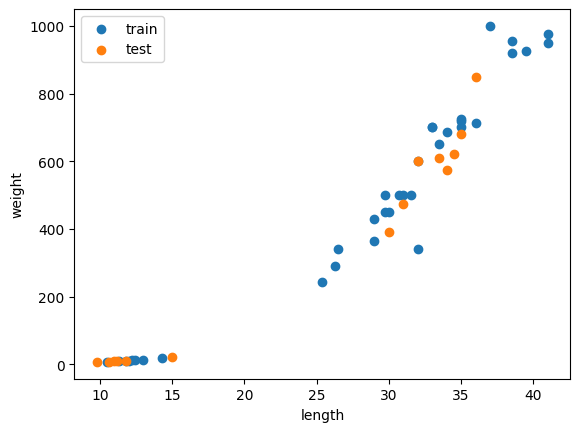

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# print(input_arr)
# print(input_arr.shape)

# 데이터의 인덱스를 셔플
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

# print(index)

# 셔플된 인덱스를 활용하여 랜덤하게 35개의 샘플을 추출하려 훈련 데이터 셋 제작
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 나머지로 테스트 셋 제작
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 훈련 셋, 테스트 셋이 고루 분포되어있는지 시각화를 통해 확인
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.legend(['train', 'test'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
# 다시 학습

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 예측 및 확인

print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
